In [16]:
import pandas as pd #display(df)

df = pd.read_csv('Classification.csv')
display(df)
#df.head(10)
#df.dtypes
#df.info()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1



Accuracy: 0.66
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       412
           1       0.59      0.26      0.36       244

    accuracy                           0.66       656
   macro avg       0.63      0.58      0.56       656
weighted avg       0.64      0.66      0.62       656



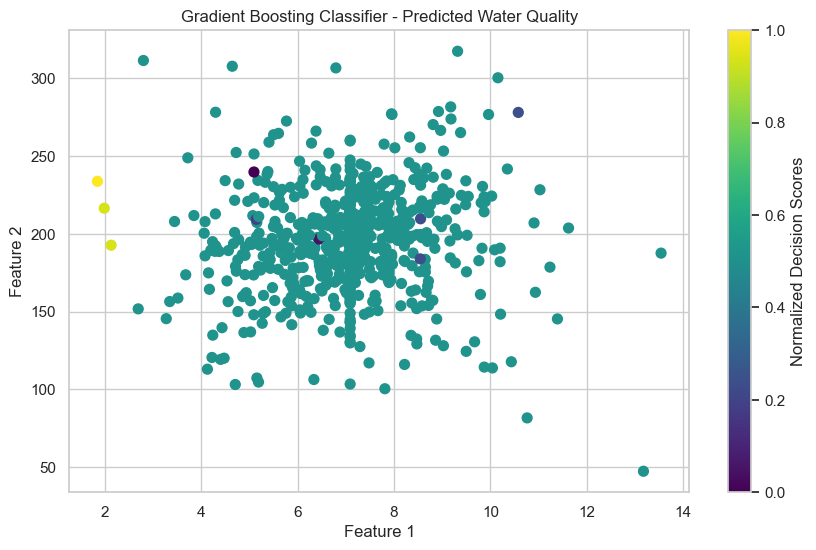

In [51]:
# IMPORTS ZONE
# Import pandas library
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# ///////////////////////////////////////////////////////////

# DATA OVERVIEW & PREPROCESSING
df = pd.read_csv('Classification.csv')
# display(df)
X = df.drop('Quality', axis=1)  # Drop what u want to predict
y = df['Quality']  # Target variable
df = df.dropna(subset=['Trihalomethanes'])  # Dropped Trihalomethanes due to it being less than 5% of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # Train_Test_Split the data
imp_num = SimpleImputer()   # Imputing data with simple imputer
X_train = imp_num.fit_transform(X_train)
X_test = imp_num.transform(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# ///////////////////////////////////////////////////////////



# ///////////////////////////////////////////////////////////
# USING GRADIENTBOOSTINGCLASSIFIER AS OUR MODEL

model = GradientBoostingClassifier() # Model initialization
model.fit(X_train_scaled, y_train) # Model training (fitting the model)
y_pred = model.predict(X_test_scaled) # Making predictions
accuracy = accuracy_score(y_test, y_pred)


# ///////////////////////////////////////////////////////////

# PRINTING ACCURACY AND REPORT
print(f"\nAccuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


feature1 = X_test[:, 0]
feature2 = X_test[:, 1]
# Get decision function scores from the model
decision_scores = model.decision_function(X_test)
# Normalize scores to be in the range [0, 1] for better visualization
normalized_scores = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
plt.figure(figsize=(10, 6))
scatter = plt.scatter(feature1, feature2, c=normalized_scores, cmap='viridis', s=50)
plt.title('Gradient Boosting Classifier - Predicted Water Quality')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Add a colorbar to show the mapping of scores to colors
cbar = plt.colorbar(scatter)
cbar.set_label('Normalized Decision Scores')

plt.show()


Best Hyperparameters: {'n_neighbors': 15}
KNN Accuracy: 0.66
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       412
           1       0.58      0.32      0.41       244

    accuracy                           0.66       656
   macro avg       0.63      0.59      0.59       656
weighted avg       0.64      0.66      0.63       656

KNN Confusion Matrix:
[[356  56]
 [166  78]]


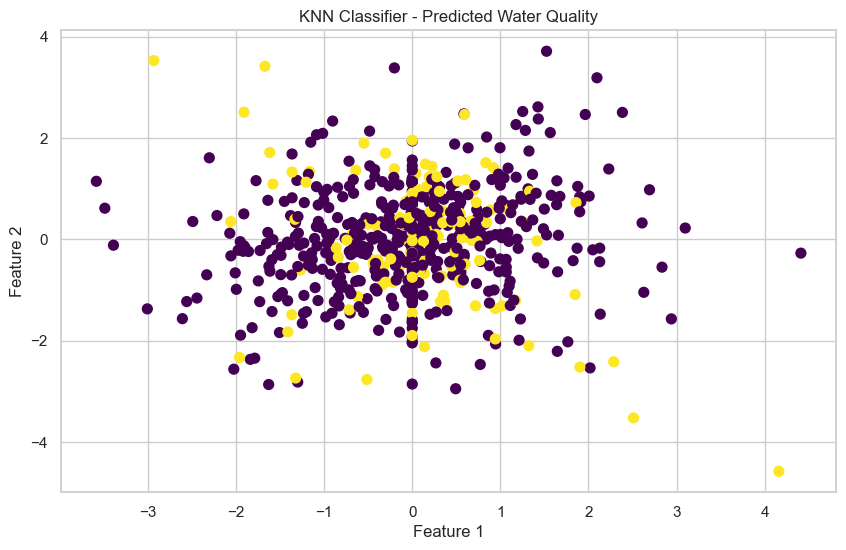

In [27]:
# IMPORTS ZONE
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('Classification.csv')

# Define features (X) and target variable (y)
X = df.drop('Quality', axis=1)
y = df['Quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imp_num = SimpleImputer()   # Impute data with simple imputer
X_train = imp_num.fit_transform(X_train)
X_test = imp_num.transform(X_test)

# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN model
knn_model = KNeighborsClassifier()

# Defining hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 15, 17]  
}

# Creating a GridSearchCV hyperparameter
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)
# Get the best hyperparameters
best_n_neighbors = grid_search.best_params_['n_neighbors']
# Create a new KNN model with the best hyperparameters
best_knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
# Train the model
best_knn_model.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred = best_knn_model.predict(X_test_scaled)

print("Best Hyperparameters:", grid_search.best_params_)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.2f}")
# Print classification report
print("KNN Classification Report:")
print(classification_report(y_test, y_pred))
# Print confusion matrix
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot a 2D graph 
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='viridis', s=50)
plt.title('KNN Classifier - Predicted Water Quality')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       203
           1       0.66      0.34      0.44       125

    accuracy                           0.68       328
   macro avg       0.67      0.61      0.61       328
weighted avg       0.67      0.68      0.65       328



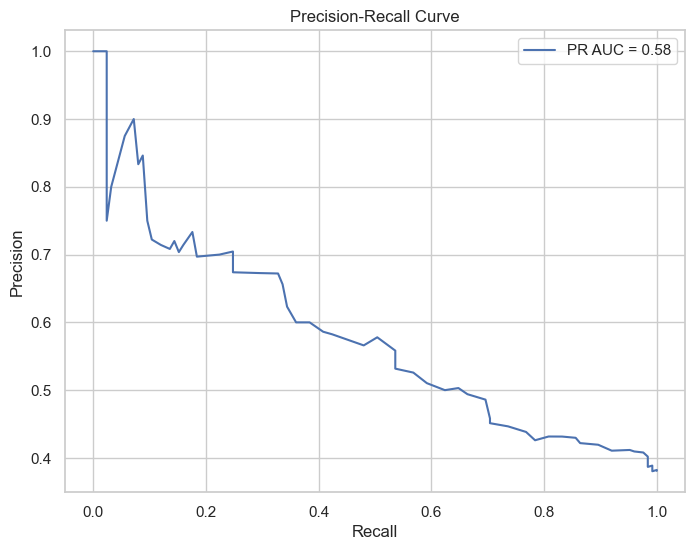

In [33]:
# IMPORTS ZONE
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Classification.csv')

# Define features (X) and target variable (y)
X = df.drop('Quality', axis=1)  # Drop what u want to predict
y = df['Quality']  # Target variable
df = df.dropna(subset=['Trihalomethanes'])  # Dropped Trihalomethanes due to it being less than 5% of data

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

# Impute missing values using SimpleImputer
imp_num = SimpleImputer()   # Imputing data with simple imputer
X_train = imp_num.fit_transform(X_train)
X_test = imp_num.transform(X_test)

# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a model 
model = RandomForestClassifier(n_estimators=100, random_state=50)
# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


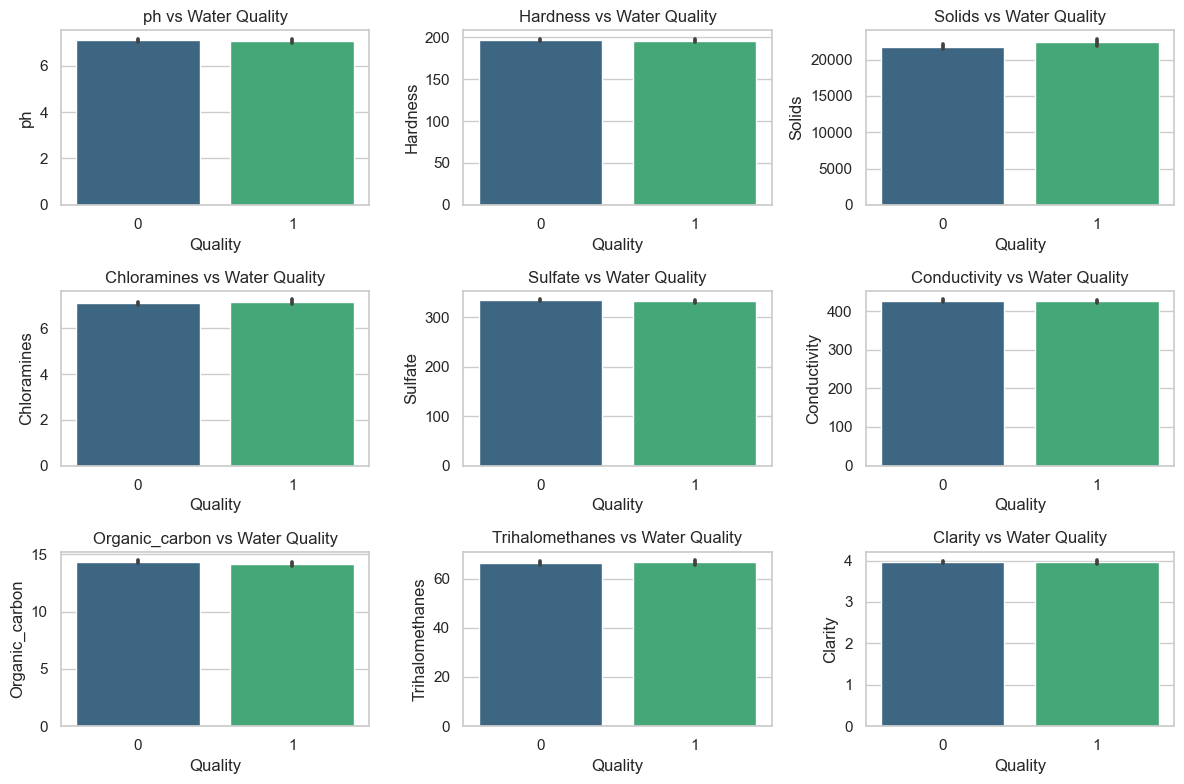

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Classification.csv')

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Iterate through each feature
for feature in df.columns[:-1]:  # Exclude the target variable
    plt.subplot(3, 3, df.columns.get_loc(feature) + 1)
    sns.barplot(x='Quality', y=feature, data=df, palette="viridis")
    plt.title(f"{feature} vs Water Quality")

plt.tight_layout()
plt.show()


Best Hyperparameters: {'max_depth': None, 'n_estimators': 150}

Accuracy: 0.68

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       203
           1       0.66      0.34      0.44       125

    accuracy                           0.68       328
   macro avg       0.67      0.61      0.61       328
weighted avg       0.67      0.68      0.65       328



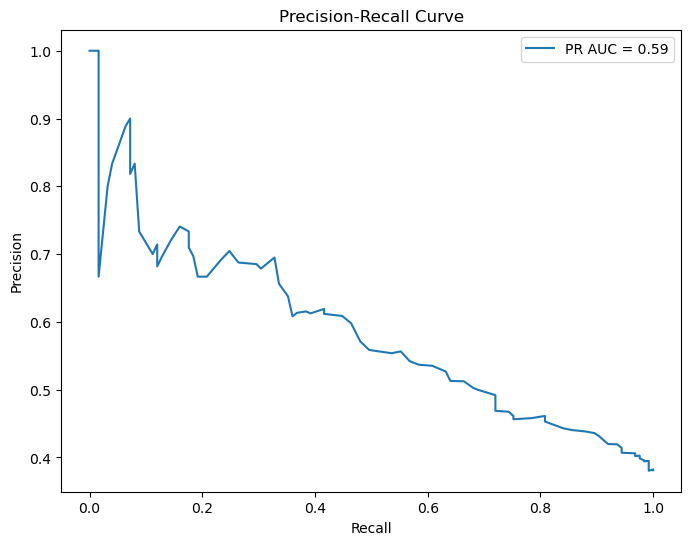

In [13]:
# IMPORTS ZONE
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Classification.csv')

# Define features (X) and target variable (y)
X = df.drop('Quality', axis=1)  # Drop what u want to predict
y = df['Quality']  # Target variable
df = df.dropna(subset=['Trihalomethanes'])  # Dropped Trihalomethanes due to it being less than 5% of data

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)

# Impute missing values using SimpleImputer
imp_num = SimpleImputer()   # Imputing data with simple imputer
X_train = imp_num.fit_transform(X_train)
X_test = imp_num.transform(X_test)

# Create a model 
model = RandomForestClassifier(random_state=50)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

# Create the grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
